In [45]:
import time

def timemycode(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Function {func.__name__} took {end_time - start_time:.5f} seconds to execute.")
        return result
    return wrapper


In [87]:
map={
    'Engineering Buiding':{
        'latitude':32.214256505009985,
        'longitude': -98.21779723918512
    },
     'Library':{
         'latitude':32.215730969726785,
         'longitude': -98.21730569278304
     },
     'Nursing Building':{
         'latitude':32.21664588196621,
         'longitude': -98.22043371534166
     },
     'Centennial':{
        'latitude':32.217553223855305,
        'longitude': -98.2217742964382
    },
     'Rec':{
         'latitude':32.21630562642345,
         'longitude':  -98.2224535241938
     },
      'Science Building':{
         'latitude':     32.216883861659866, 
         'longitude': -98.21972368519181
     },

     'Student Center':{
         'latitude':32.21768176322404, 
         'longitude': -98.21858371342843,
     }
     ,'Dining Hall':{
        'latitude':32.2178254246564,
        'longitude': -98.21791342288013
    },
     'Honors Hall':{
         'latitude':32.216131717543234, 
         'longitude':  -98.21936125046442,
     },
     'Heritage Hall':{
         'latitude':32.21875543791148, 
         'longitude':  -98.21975448758607
     },
     'Hunnewell Hall':{
        'latitude':32.21636498651769,
        'longitude':  -98.2146443060869, 
    },
     'Mathematic Building':{
         'latitude':32.216696108219054, 
         'longitude': -98.21673716080358
     },
     'Legends':{
         'latitude':32.21772417564671,
         'longitude':  -98.2212426209783
     }
     ,'Legacy':{
        'latitude':32.217963653269614,
        'longitude':  -98.220472065015
    },
     'Integrity Hall':{
         'latitude':32.21921876315668, 
         'longitude':  -98.22109181516743
     },
     'Texan Village':{
         'latitude':32.21862007618148, 
         'longitude':  -98.22219260940068
     }

}

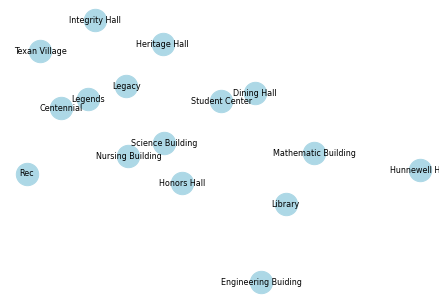

In [34]:
lat_miles_per_degree = 69

# 32.214256505009985 
lon_miles_per_degree = 69.172


for location in map:
    map[location]['latitude'] *= lat_miles_per_degree
    map[location]['longitude'] *= lon_miles_per_degree

G = nx.Graph()
for location in map:
    latitude = map[location]['latitude']
    longitude = map[location]['longitude']
    G.add_node(location, pos=(longitude, latitude))

 
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True ,node_color='lightblue', node_size=500, font_size=8)
plt.show()

In [39]:
planned = list(map.keys())[0:7]
planned

['Engineering Buiding',
 'Library',
 'Nursing Building',
 'Centennial',
 'Rec',
 'Science Building',
 'Student Center']

In [46]:
@timemycode
def find_optimal_path(planned, start, end, map):
    distances = []
    for i in range(len(planned) - 1):
        start_lat = map[planned[i]]['latitude']
        start_lon = map[planned[i]]['longitude']
        end_lat = map[planned[i+1]]['latitude']
        end_lon = map[planned[i+1]]['longitude']
        distance = ((end_lat - start_lat)**2 + (end_lon - start_lon)**2)**0.5
        distances.append(distance)
    best_path = planned
    best_distance = sum(distances)
    from itertools import permutations
    for path in permutations(planned):
        new_distances = []
        for i in range(len(path) - 1):
            start_lat = map[path[i]]['latitude']
            start_lon = map[path[i]]['longitude']
            end_lat = map[path[i+1]]['latitude']
            end_lon = map[path[i+1]]['longitude']
            distance = ((end_lat - start_lat)**2 + (end_lon - start_lon)**2)**0.5
            new_distances.append(distance)
        new_distance = sum(new_distances)
        if new_distance < best_distance:
            best_path = path
            best_distance = new_distance
    start_index = best_path.index(start)
    end_index = best_path.index(end)
    if start_index < end_index:
        return best_path[start_index:end_index+1]
    else:
        return best_path[end_index:start_index+1][::-1]


In [62]:
def find_optimal_path_new(planned, start, end, map):
    distances = []
    times = []
    for i in range(len(planned) - 1):
        start_lat = map[planned[i]]['latitude']
        start_lon = map[planned[i]]['longitude']
        end_lat = map[planned[i+1]]['latitude']
        end_lon = map[planned[i+1]]['longitude']
        distance = ((end_lat - start_lat)**2 + (end_lon - start_lon)**2)**0.5
        time = estimate_time(map, planned[i], planned[i+1])
        distances.append(distance)
        times.append(time)
    best_path = planned
    best_distance = sum(distances)
    from itertools import permutations
    for path in permutations(planned):
        new_distances = []
        new_times = []
        for i in range(len(path) - 1):
            start_lat = map[path[i]]['latitude']
            start_lon = map[path[i]]['longitude']
            end_lat = map[path[i+1]]['latitude']
            end_lon = map[path[i+1]]['longitude']
            distance = ((end_lat - start_lat)**2 + (end_lon - start_lon)**2)**0.5
            time = estimate_time(map, path[i], path[i+1])
            new_distances.append(distance)
            new_times.append(time)
        new_distance = sum(new_distances)
        new_time = sum(new_times)
        if new_distance < best_distance:
            best_path = path
            best_distance = new_distance
            best_times = new_times
    start_index = best_path.index(start)
    end_index = best_path.index(end)
    if start_index < end_index:
        return best_path[start_index:end_index+1], best_times[start_index:end_index]
    else:
        return best_path[end_index:start_index+1][::-1], best_times[end_index:start_index][::-1]


In [173]:
planned =[

 'Nursing Building',
  'Library',
 'Centennial',
 'Rec',
 'Dining Hall',
 'Science Building',
 'Student Center']
start = 'Dining Hall'
end='Rec'
path = find_optimal_path(planned, start, end, map)
print(path)


Function find_optimal_path took 0.10890 seconds to execute.
('Dining Hall', 'Student Center', 'Science Building', 'Nursing Building', 'Centennial', 'Rec')


In [60]:
from math import sin, cos, sqrt, atan2, radians

def estimate_time(map, start, end):
    lat1, lon1 = map[start]['latitude'], map[start]['longitude']
    lat2, lon2 = map[end]['latitude'], map[end]['longitude']
    lat_diff = radians(lat2 - lat1)
    lon_diff = radians(lon2 - lon1)
    a = sin(lat_diff / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(lon_diff / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 3959 * c # 3959  

    # Estimate time based on distance
    walking_speed = 3.1 # miles per hour
    time = distance / walking_speed
    return time

In [59]:
estimate_time(map,'Honors Hall','Centennial')

0.198806411160471

In [64]:
np.array([[0 for i in range(10)] for i in range(10)])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [67]:
import numpy as np
from scipy.spatial.distance import cdist

def map_to_maze(map_dict):
    # extract coordinates from map dictionary
    coords = np.array([[loc['latitude'], loc['longitude']] for loc in map_dict.values()])

    # compute distances between all pairs of points
    dists = cdist(coords, coords)

    # create empty maze array
    maze = np.zeros((len(map_dict), len(map_dict)))

    # assign random values to maze cells
    maze.flat = np.random.randint(1, 10, size=len(maze))

    # set distance values in maze array
    for i, key in enumerate(map_dict.keys()):
        for j, key2 in enumerate(map_dict.keys()):
            if i != j:
                maze[i][j] = dists[i][j]

    return maze.astype(int)


In [69]:
len(map.keys())

16

In [68]:
map_to_maze(map)

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])

In [96]:
import math

def ltlg_distance(pos1, pos2):

    lat1 = math.radians(map[pos1]['latitude'])
    lon1 = math.radians(map[pos1]['longitude'])

    lat2 = math.radians(map[pos2]['latitude'])
    lon2 = math.radians(map[pos2]['longitude'])
    print(map[pos1]['latitude'],map[pos1]['longitude'])

 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 3961 * c  

    return round(distance,1)


In [98]:
ltlg_distance('Centennial','Honors Hall')

32.217553223855305 -98.2217742964382


0.2

In [106]:
def llgxy(latitude, longitude):
    x = (longitude + 180) / 360 * 10
    y = (latitude + 90) / 180 * 10
    return x, y
llgxy(32.217553223855305, -98.2217742964382)


(2.2716173806544946, 6.789864067991961)

In [119]:
xr=[]
yr=[]
for pos1 in map:
  print()
  x = round((map[pos1]['longitude'] + 180) / 360 * 10,10)
  y = round((map[pos1]['latitude']+90) / 180 * 10,10)
  xr.append(x)
  yr.append(y)
  print((x,y))
# xr.sort()
# yr.sort()
print(xr)
print(yr)


(2.2717278545, 6.7896809169)

(2.2717415085, 6.7897628317)

(2.271654619, 6.7898136601)

(2.2716173807, 6.789864068)

(2.2715985132, 6.789794757)

(2.2716743421, 6.7898268812)

(2.271706008, 6.7898712091)

(2.2717246271, 6.7898791903)

(2.2716844097, 6.7897850954)

(2.2716734865, 6.7899308577)

(2.2718154359, 6.7897980548)

(2.2717573011, 6.7898164505)

(2.2716321494, 6.7898735653)

(2.2716535537, 6.7898868696)

(2.2716363385, 6.789956598)

(2.2716057608, 6.7899233376)
[2.2717278545, 2.2717415085, 2.271654619, 2.2716173807, 2.2715985132, 2.2716743421, 2.271706008, 2.2717246271, 2.2716844097, 2.2716734865, 2.2718154359, 2.2717573011, 2.2716321494, 2.2716535537, 2.2716363385, 2.2716057608]
[6.7896809169, 6.7897628317, 6.7898136601, 6.789864068, 6.789794757, 6.7898268812, 6.7898712091, 6.7898791903, 6.7897850954, 6.7899308577, 6.7897980548, 6.7898164505, 6.7898735653, 6.7898868696, 6.789956598, 6.7899233376]


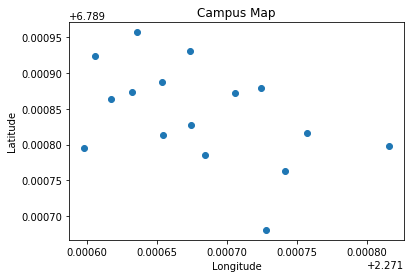

In [117]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot(xr, yr,'o')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Campus Map')
plt.show()


In [122]:
max(yr)

6.789956598

In [127]:
max(xr)
min(xr)

2.2718154359

In [135]:
round(max(xr),67)

2.2718154359

In [158]:
round(xr[0],5)
len(xr)

[2.2717278545,
 2.2717415085,
 2.271654619,
 2.2716173807,
 2.2715985132,
 2.2716743421,
 2.271706008,
 2.2717246271,
 2.2716844097,
 2.2716734865,
 2.2718154359,
 2.2717573011,
 2.2716321494,
 2.2716535537,
 2.2716363385,
 2.2716057608]

In [164]:
def print_maze(maze):
    for row in maze:
        print(" | ".join(str(cell) for cell in row))
       

def create_maze(xr,yr):
  ascii_array = [chr(i) for i in range(128) if chr(i).isalnum()]
  points = [(xr[_],yr[_]) for _ in range(len(xr))]
  tokens={ascii_array[_]:points[_] for _ in range(len(points))}
  #print(points)
  maze = np.array([['#' for _ in range(len(xr))]for _ in range(len(xr))])
  for point, token in zip(points, tokens):
        print(point[0],point[1])
        maze[point[0]][point[1]] = 2
  print_maze(maze)
  
 

create_maze(xr,yr)

2.2717278545 6.7896809169


IndexError: ignored

In [148]:
ord('a')

97

In [169]:
sorted_xr = np.sort(xr)
ascii_array = [chr(i) for i in range(128) if chr(i).isalnum()]    
    # calculate the range between each adjacent x-coordinate
x_range = np.diff(sorted_xr)
np.min(x_range) / (len(ascii_array) - 1)

1.4026229503907998e-08

In [170]:
xr

[2.2717278545,
 2.2717415085,
 2.271654619,
 2.2716173807,
 2.2715985132,
 2.2716743421,
 2.271706008,
 2.2717246271,
 2.2716844097,
 2.2716734865,
 2.2718154359,
 2.2717573011,
 2.2716321494,
 2.2716535537,
 2.2716363385,
 2.2716057608]